In [1]:
from cryosparc.tools import CryoSPARC
import json
import numpy as np
import pandas as pd
import plotnine
from plotnine import ggplot, aes
with open('/u/rposert/instance-info.json', 'r') as f:
    instance_info = json.load(f)

In [2]:
cs = CryoSPARC(**instance_info)
cs.test_connection()

Connection succeeded to CryoSPARC command_core at http://localhost:40002
Connection succeeded to CryoSPARC command_vis at http://localhost:40003
Connection succeeded to CryoSPARC command_rtp at http://localhost:40005


True

In [3]:
project = cs.find_project('P297')
flex_train = project.find_job('J45')
particles = flex_train.load_output('particles')

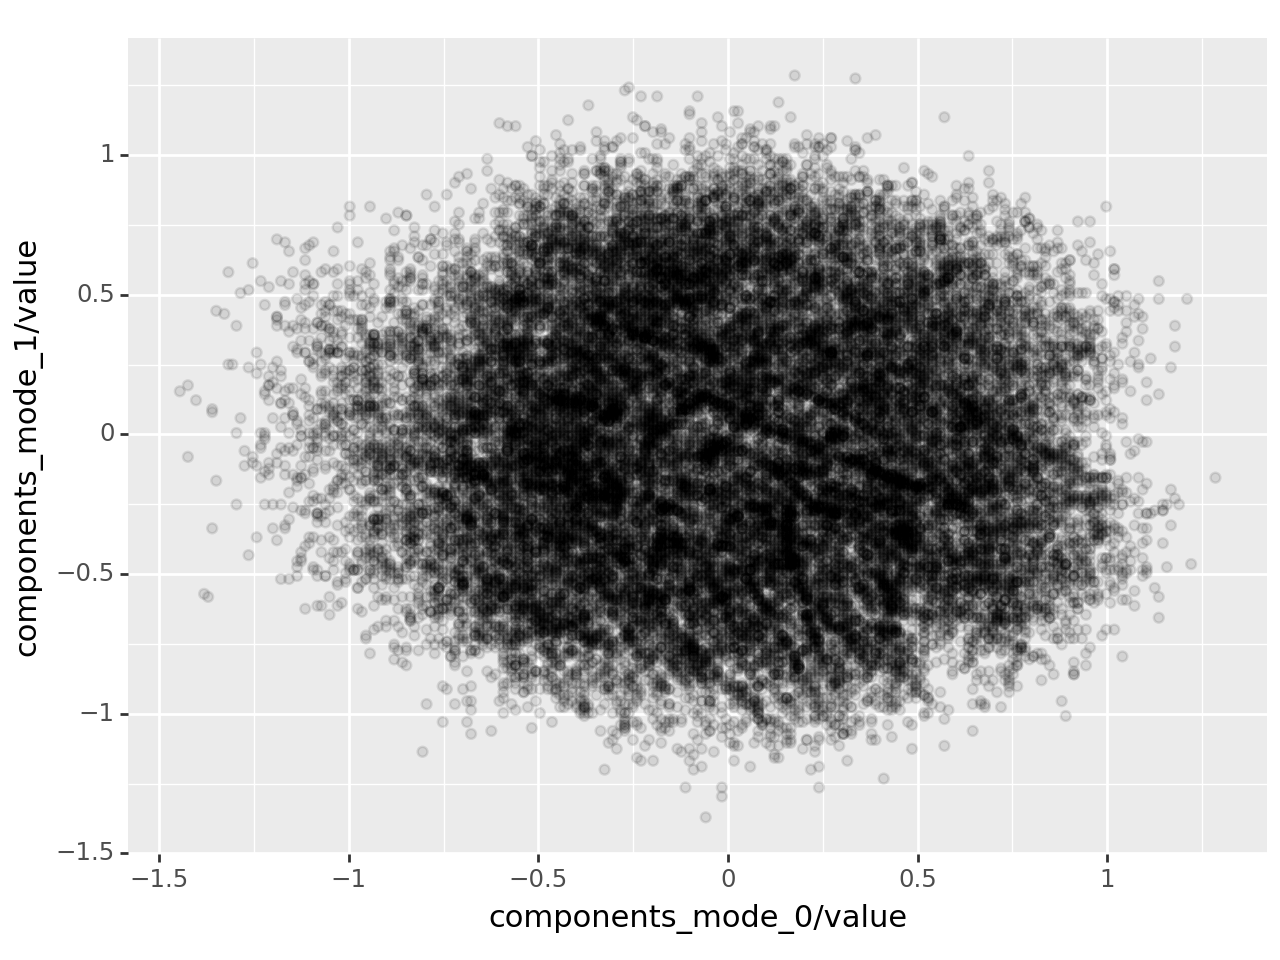

<Figure Size: (640 x 480)>

In [6]:
pre_filter = pd.DataFrame(particles.rows())
(ggplot(pre_filter, aes('components_mode_0/value', 'components_mode_1/value'))
 + plotnine.geom_point(alpha = 0.1))

In [10]:
bool_mask = np.sqrt(particles['components_mode_0/value']**2 + particles['components_mode_1/value']**2) > 0.75
outliers_only = particles.mask(bool_mask)


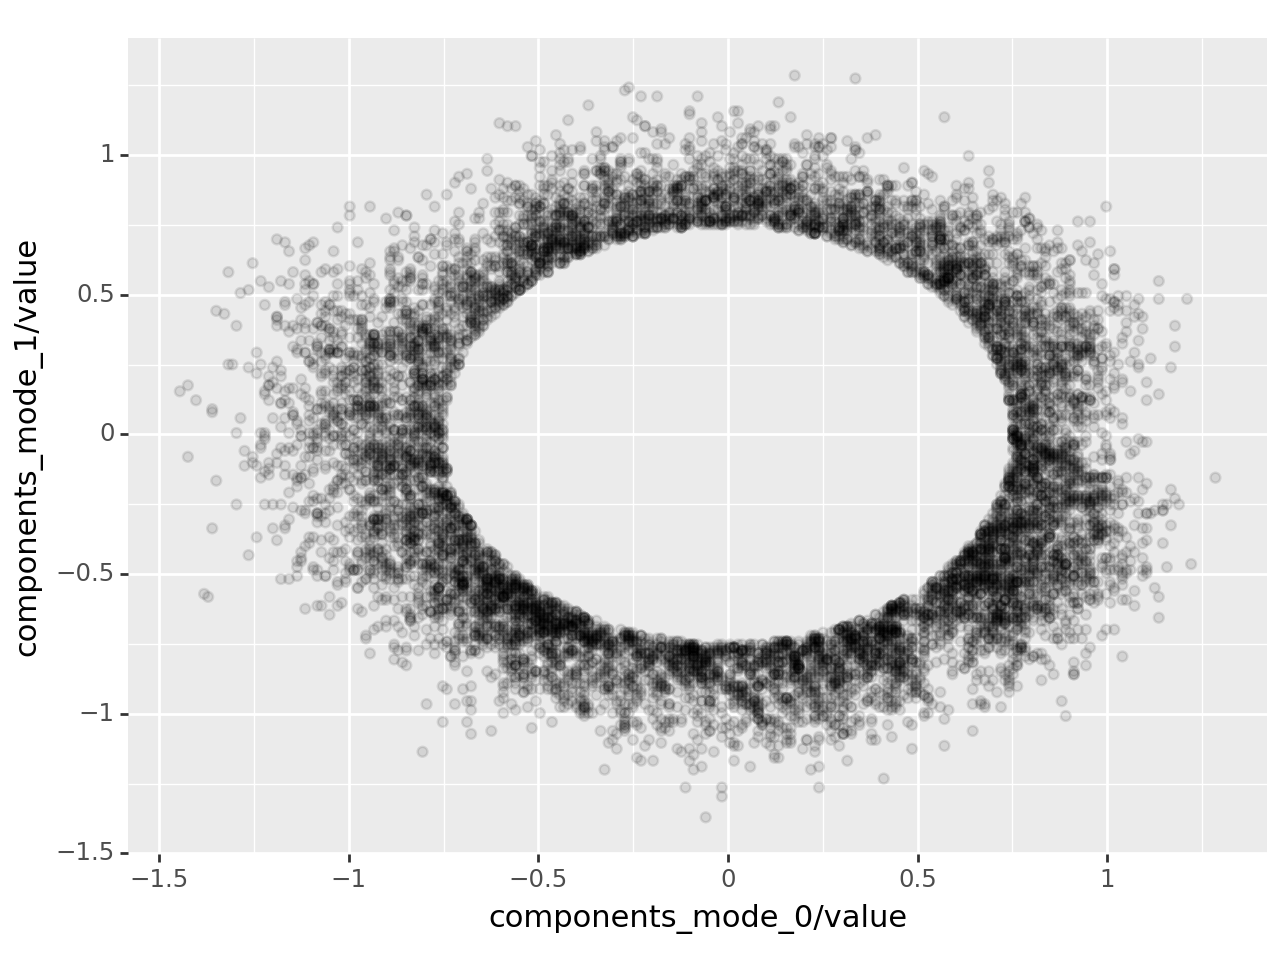

<Figure Size: (640 x 480)>

In [11]:
post_filter = pd.DataFrame(outliers_only.rows())
(ggplot(post_filter, aes('components_mode_0/value', 'components_mode_1/value'))
 + plotnine.geom_point(alpha = 0.1))